Завантажимо необхідні бібліотеки

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

Завантажимо дані вибірки

In [2]:
df = pd.read_csv("TEST TASK (dataset).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

Бачимо, що в колонках total_sessions_day0, totaL_sessions_day1, total_sessions_day3, total_sessions_day7 відсутні дані в більше ніж тисячі рядків. <br/>
Подивимось на ці рядки:

In [4]:
df[df['total_sessions_day0'].isna()].info()
df[df['total_sessions_day0'].isna()].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 29 to 1466105
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_sessions_day0         0 non-null      float64
 1   total_sessions_day1         0 non-null      float64
 2   total_sessions_day3         0 non-null      float64
 3   total_sessions_day7         0 non-null      float64
 4   chapters_finished_day0      1365 non-null   int64  
 5   chapters_finished_day1      1365 non-null   int64  
 6   chapters_finished_day3      1365 non-null   int64  
 7   chapters_finished_day7      1365 non-null   int64  
 8   chapters_opened_day0        1365 non-null   int64  
 9   chapters_opened_day1        1365 non-null   int64  
 10  chapters_opened_day3        1365 non-null   int64  
 11  chapters_opened_day7        1365 non-null   int64  
 12  chapters_closed_day0        1365 non-null   int64  
 13  chapters_closed_day1        1

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
count,0.0,0.0,0.0,0.0,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,...,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,NaN,NaN,NaN,NaN,0.499634,0.499634,0.499634,0.499634,1.320147,1.320147,...,0.042162,0.042162,0.042162,0.003687,0.003687,0.003687,0.013490,0.042162,0.003687,0.059339
std,NaN,NaN,NaN,NaN,0.985693,0.985693,0.985693,0.985693,1.086810,1.086810,...,0.285587,0.285587,0.285587,0.016720,0.016720,0.016720,0.226411,0.285587,0.016720,0.411626
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,NaN,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,...,5.412272,5.412272,5.412272,0.359532,0.359532,0.359532,5.951515,5.412272,0.359532,7.934691


Бачимо, що квантилі цільових змінних мають правдоподібний вигляд, тому можемо зробити припущення, що дані відсутні через помилку в логуванні даних.

Перевіримо, чи для всіх записів сумарні доходи дорівнюють сумі доходів з підписок, реклами та покупок кристалів/тікетів:

In [8]:
df_temp = df.loc[(df['target_full_ltv_day30'] - df['target_sub_ltv_day30'] - df['target_iap_ltv_day30'] - df['target_ad_ltv_day30']) > 0, ['target_sub_ltv_day30', 'target_ad_ltv_day30', 'target_iap_ltv_day30', 'target_full_ltv_day30']]

(df_temp['target_full_ltv_day30'] - (df_temp['target_sub_ltv_day30'] + df_temp['target_iap_ltv_day30'] + df_temp['target_ad_ltv_day30'])).describe()

count    3.583100e+04
mean     4.525009e-16
std      1.693100e-15
min     -1.421085e-14
25%      0.000000e+00
50%      1.110223e-16
75%      4.440892e-16
max      1.136868e-13
dtype: float64

Бачимо, що відмінності мізерні і пов'язані з проблемами відображення 0 в комп'ютері. Поглянемо на вклад кожного джерела доходів в сумарний дохід:

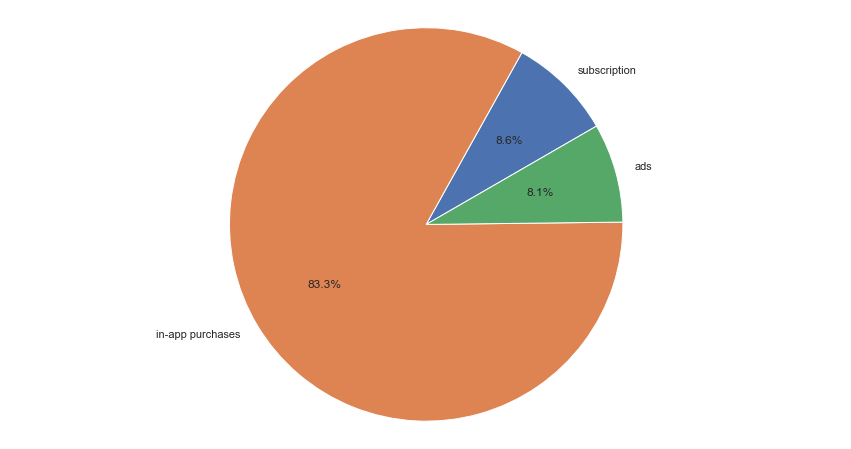

In [ ]:
labels = ["subscription", "in-app purchases", "ads"]
sizes = [sum(df['target_sub_ltv_day30']) / sum(df['target_full_ltv_day30']),
        sum(df['target_iap_ltv_day30']) / sum(df['target_full_ltv_day30']),
        sum(df['target_ad_ltv_day30']) / sum(df['target_full_ltv_day30'])]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.axis('equal')
plt.show()

Поглянемо на статистики цільових змінних:

In [84]:
df[['target_ad_ltv_day30', 'target_iap_ltv_day30', 'target_sub_ltv_day30', 'target_full_ltv_day30']].describe()

,target_ad_ltv_day30,target_iap_ltv_day30,target_sub_ltv_day30,target_full_ltv_day30
count,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06
mean,2.091572e-02,2.139268e-01,2.203037e-02,2.568728e-01
std,1.601929e-01,2.097916e+00,3.088758e-01,2.274466e+00
min,0.000000e+00,0.000000e+00,-2.829604e+00,-2.777195e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.393084e+01,2.687878e+02,4.545741e+01,2.720042e+02


Бачимо, що в target_sub_ltv_day30 та target_full_ltv_day30 присутні рядки з від'ємними значеннями, поглянемо на них:

In [87]:
df[df['target_sub_ltv_day30'] < 0.]

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
324112,1.0,1.0,1.0,1.0,7,7,7,7,11,11,...,2022-01-28,COUNTRY_123,0.032012,0.032012,0.032012,ios,-2.829604,0.000000,0.052409,-2.777195
1026084,3.0,6.0,7.0,7.0,8,11,15,15,10,12,...,2022-01-03,COUNTRY_72,0.033082,0.063409,0.063409,ios,-0.619771,9.071147,0.063409,8.514784


In [88]:
df[df['target_full_ltv_day30'] < 0.]

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
324112,1.0,1.0,1.0,1.0,7,7,7,7,11,11,...,2022-01-28,COUNTRY_123,0.032012,0.032012,0.032012,ios,-2.829604,0.0,0.052409,-2.777195


Бачимо, що в двох рядках прибуток з підписки від'ємний, і в одному з них аж настільки від'ємний, що сумарний дохід є меншим за нуль. Ці дані скоріш за все є помилковими і можуть негативно вплинути на модель, тому видалимо їх:

In [91]:
df.drop([324112, 1026084], inplace=True)
df[['target_ad_ltv_day30', 'target_iap_ltv_day30', 'target_sub_ltv_day30', 'target_full_ltv_day30']].describe()

,target_ad_ltv_day30,target_iap_ltv_day30,target_sub_ltv_day30,target_full_ltv_day30
count,1.467830e+06,1.467830e+06,1.467830e+06,1.467830e+06
mean,2.091567e-02,2.139209e-01,2.203275e-02,2.568693e-01
std,1.601930e-01,2.097904e+00,3.088666e-01,2.274456e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.393084e+01,2.687878e+02,4.545741e+01,2.720042e+02


Поглянемо на дані:

In [4]:
df.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [5]:
df.tail()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,...,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,...,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,...,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,...,2021-12-30,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774
1467831,6.0,7.0,7.0,7.0,15,15,15,15,15,16,...,2021-12-30,COUNTRY_141,0.114909,0.114909,0.114909,android,0.000000,3.949385,0.114909,4.064295


Поглянемо на назви колонок:

In [6]:
df.columns

Index(['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7', 'chapters_finished_day0',
       'chapters_finished_day1', 'chapters_finished_day3',
       'chapters_finished_day7', 'chapters_opened_day0',
       'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3',
       'chapters_closed_day7', 'diamonds_received_day0',
       'diamonds_received_day1', 'diamonds_received_day3',
       'diamonds_received_day7', 'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_opened_session9'

In [11]:
print("platform: ", df['platform'].unique())
print("\ninstall_date: ", df['install_date'].unique(), len(df['install_date'].unique()))
print("\nmedia_source: ", df['media_source'].unique(), len(df['media_source'].unique()))
print("\ncountry_code: ", df['country_code'].unique(), len(df['country_code'].unique()))

platform:  ['ios' 'android']

install_date:  ['2021-12-03' '2021-12-07' '2021-12-02' '2021-12-08' '2021-12-06'
 '2021-12-04' '2021-12-01' '2022-01-20' '2021-12-05' '2021-12-09'
 '2021-12-15' '2021-12-11' '2022-01-27' '2022-01-24' '2022-01-25'
 '2022-01-31' '2022-01-17' '2022-01-26' '2022-01-29' '2022-01-15'
 '2021-12-16' '2021-12-13' '2021-12-10' '2022-01-30' '2022-01-21'
 '2022-01-22' '2022-01-10' '2022-01-19' '2022-01-11' '2021-12-19'
 '2022-01-28' '2022-01-18' '2021-12-12' '2022-01-07' '2021-12-14'
 '2022-01-13' '2021-12-17' '2022-01-16' '2022-01-09' '2022-01-23'
 '2021-12-18' '2022-01-08' '2022-01-14' '2021-12-20' '2022-01-04'
 '2022-01-05' '2022-01-06' '2022-01-12' '2021-12-22' '2021-12-25'
 '2021-12-27' '2021-12-29' '2022-01-01' '2021-12-23' '2022-01-03'
 '2021-12-21' '2021-12-28' '2021-12-24' '2021-12-30' '2022-01-02'
 '2021-12-26' '2021-12-31'] 62

media_source:  ['SOURCE_23' 'SOURCE_2' 'SOURCE_17' 'SOURCE_1' 'SOURCE_10' 'SOURCE_18'
 'SOURCE_9' 'SOURCE_5' 'SOURCE_3' 'SOURCE_6' 

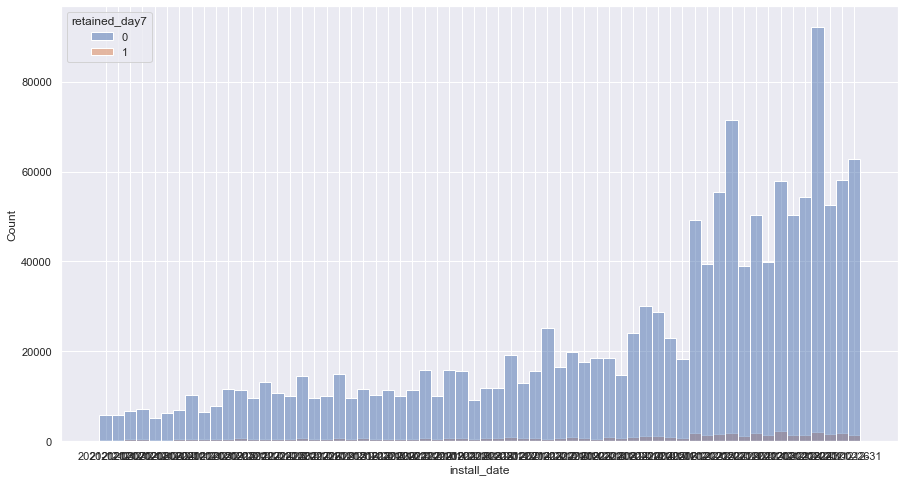

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.displot(x="install_date", hue="retained_day7", data=df)

<AxesSubplot:xlabel='platform', ylabel='count'>

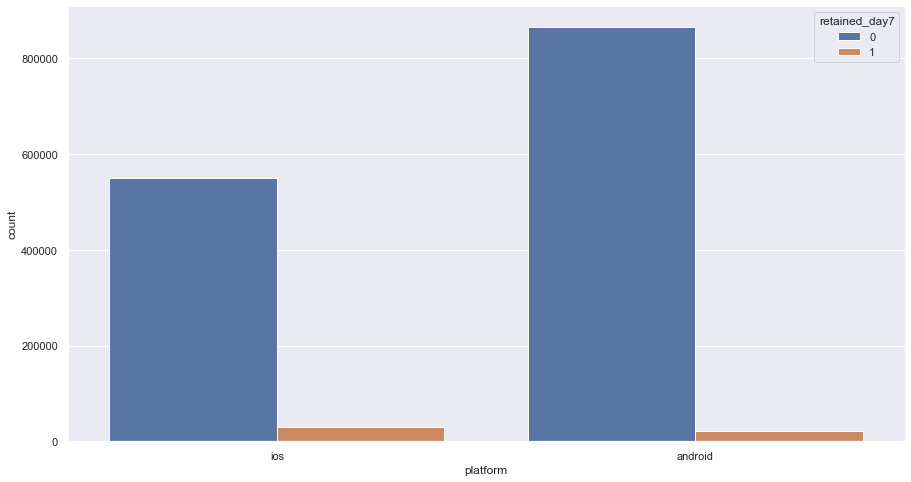

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="platform", hue="retained_day7", data=df)

<AxesSubplot:xlabel='media_source', ylabel='count'>

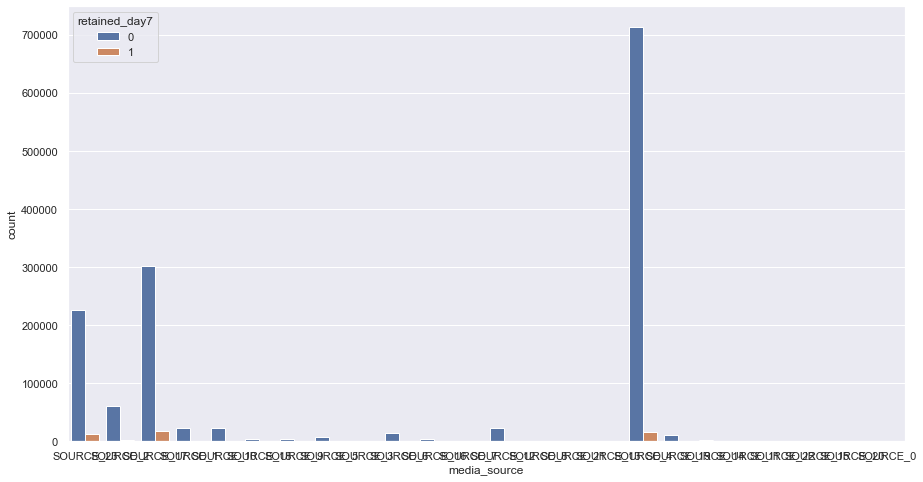

In [34]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="media_source", hue="retained_day7", data=df)

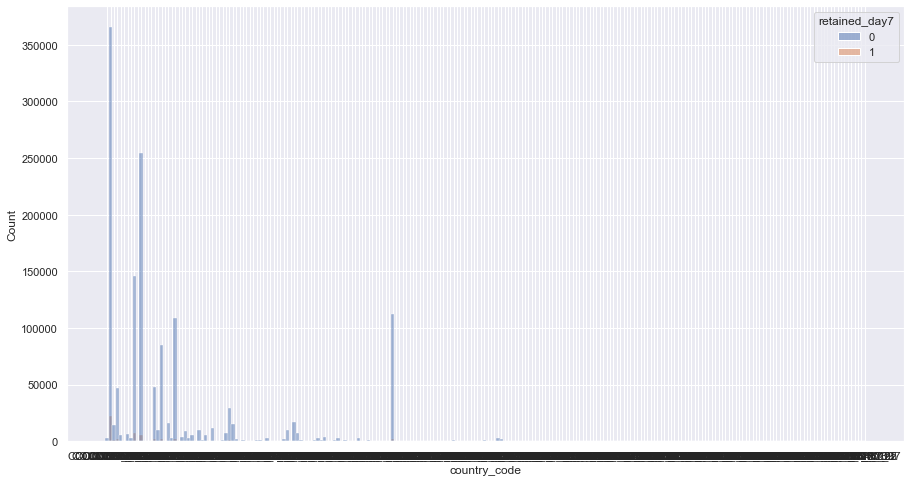

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.histplot(x="country_code", hue="retained_day7", data=df)

Розглянемо значння основних статистик для змінних total_sessions_dayN:

In [15]:
df[['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7']].describe()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7
count,1.466467e+06,1.466465e+06,1.466464e+06,1.466458e+06
mean,1.847298e+00,2.193912e+00,2.608979e+00,3.113484e+00
std,2.530825e+00,3.621980e+00,5.347342e+00,7.888102e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
max,7.710000e+02,7.710000e+02,7.710000e+02,9.050000e+02


Обчислимо значення міжквартильного розмаху, та виокремимо викиди:

In [16]:
Q1 = 1.0
Q3 = 2.0

IQR = Q3 - Q1
df[df['total_sessions_day0'] > Q3 + 1.5*IQR]

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
150,4.0,4.0,5.0,5.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
189,4.0,4.0,4.0,4.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
371,6.0,7.0,7.0,7.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_114,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
575,4.0,7.0,7.0,9.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
580,6.0,6.0,6.0,6.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467824,9.0,10.0,10.0,13.0,18,18,18,20,19,19,...,2021-12-30,COUNTRY_155,0.041055,0.041055,0.041055,ios,0.000000,9.163028,0.041055,9.204083
1467826,9.0,9.0,18.0,42.0,9,9,17,34,11,11,...,2021-12-30,COUNTRY_141,0.079232,0.079232,0.179316,android,4.546316,71.347913,2.482219,78.376447
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,...,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,...,2021-12-30,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774


Бачимо, що викиди складають приблизно 10% загальної вибірки.

На цьому завершимо EDA та приступимо до обробки датасету для подальшого тренування моделі. Спершу виділимо змінні, що будуть використовуватися далі, та створимо нові змінні, що будуть містити не кумулятивні дані. Змінні виду "...session_day{N}" (окрім тих, де N=9) використовувати далі не будемо, оскільки вони є надлишковими, враховуючи, що вже відома кількість сесій на певний день.

In [55]:
df_clean = df[['total_sessions_day0', 'chapters_finished_day0', 'chapters_opened_day0',
            'chapters_closed_day0', 'diamonds_received_day0', 'diamonds_spent_day0',
            'tickets_spent_day0', 'retained_day1', 'retained_day3', 'retained_day7',
            'app_sub_ltv_day0', 'app_iap_ltv_day0', 'ad_ltv_day0', 'media_source',
            'platform', 'chapters_finished_session9', 'chapters_opened_session9',
            'chapters_closed_session9', 'diamonds_spent_session9','tickets_spent_session9']]

ind_list = ['0', '1', '3', '7']
for i in range(1, 4):
     for col_name in ['total_sessions', 'chapters_finished', 'chapters_opened', 'chapters_closed', 
                    'diamonds_received', 'diamonds_spent', 'tickets_spent']:
          df_clean['diff_' +  col_name + '_day' + ind_list[i]] = df[col_name + '_day' + ind_list[i]] - df[col_name + '_day' + ind_list[i-1]]

ind_list = ['0', '1', '3']
for i in range(1, 3):
     for col_name in ['app_sub_ltv', 'app_iap_ltv', 'ad_ltv']:
          df_clean['diff_' +  col_name + '_day' + ind_list[i]] = df[col_name + '_day' + ind_list[i]] - df[col_name + '_day' + ind_list[i-1]]

df_clean[['target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_sub_ltv_day30', 
     'target_full_ltv_day30']] = df[['target_iap_ltv_day30', 'target_ad_ltv_day30', 
          'target_sub_ltv_day30', 'target_full_ltv_day30']]

C:\Users\nasti\AppData\Local\Temp\ipykernel_5560\1473902579.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['diff_' +  col_name + '_day' + ind_list[i]] = df[col_name + '_day' + ind_list[i]] - df[col_name + '_day' + ind_list[i-1]]
C:\Users\nasti\AppData\Local\Temp\ipykernel_5560\1473902579.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['diff_' +  col_name + '_day' + ind_list[i]] = df[col_name + '_day' + ind_list[i]] - df[col_name + '_day' + ind_list[i-1]]
C:\Users\nasti\AppData\L

Перевіримо, чи правильно створився датафрейм:

In [56]:
print(df_clean.columns, len(df_clean.columns))

Index(['total_sessions_day0', 'chapters_finished_day0', 'chapters_opened_day0',
       'chapters_closed_day0', 'diamonds_received_day0', 'diamonds_spent_day0',
       'tickets_spent_day0', 'retained_day1', 'retained_day3', 'retained_day7',
       'app_sub_ltv_day0', 'app_iap_ltv_day0', 'ad_ltv_day0', 'media_source',
       'platform', 'chapters_finished_session9', 'chapters_opened_session9',
       'chapters_closed_session9', 'diamonds_spent_session9',
       'tickets_spent_session9', 'diff_total_sessions_day1',
       'diff_chapters_finished_day1', 'diff_chapters_opened_day1',
       'diff_chapters_closed_day1', 'diff_diamonds_received_day1',
       'diff_diamonds_spent_day1', 'diff_tickets_spent_day1',
       'diff_total_sessions_day3', 'diff_chapters_finished_day3',
       'diff_chapters_opened_day3', 'diff_chapters_closed_day3',
       'diff_diamonds_received_day3', 'diff_diamonds_spent_day3',
       'diff_tickets_spent_day3', 'diff_total_sessions_day7',
       'diff_chapters_finis

Створимо і відобразимо кореляційну матрицю 

In [57]:
corr_matr = df_clean.corr()

<AxesSubplot:>

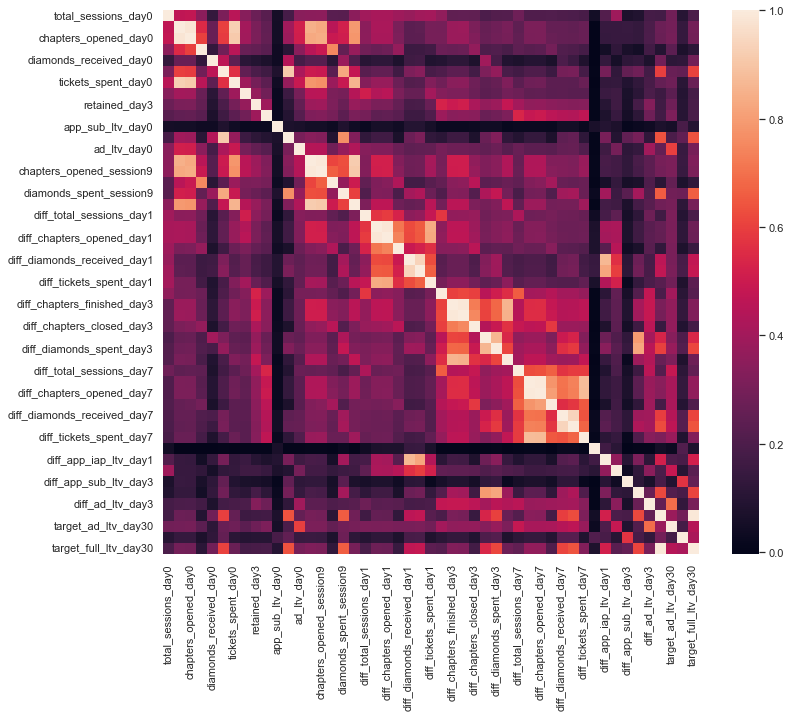

In [59]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(corr_matr)

Бачимо, що присутні змінні як і з сильною коваріацією з цільовими змінними, так і зі слабкою, проте коваріація вказує лише на лінійні залежності між змінними.

Розділимо отриманий датафрейм на метрики, що будуть використані для побудови прогнозу, і "мітки", які і маємо на меті прогнозувати

In [60]:
X = df_clean.drop(['target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_sub_ltv_day30', 
            'target_full_ltv_day30'], axis=1)
y = df_clean['target_full_ltv_day30']

Перетворимо категоричні дані, на числові, створивши окремі колонки для кожного з можливих значень:

In [61]:
X_encoded = pd.get_dummies(X, columns=['platform', 'media_source'])

Розділимо отримані датасети на тренувальні та валідаційні:

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100874 entries, 793684 to 121958
Data columns (total 71 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   total_sessions_day0          1099835 non-null  float64
 1   chapters_finished_day0       1100874 non-null  int64  
 2   chapters_opened_day0         1100874 non-null  int64  
 3   chapters_closed_day0         1100874 non-null  int64  
 4   diamonds_received_day0       1100874 non-null  int64  
 5   diamonds_spent_day0          1100874 non-null  int64  
 6   tickets_spent_day0           1100874 non-null  int64  
 7   retained_day1                1100874 non-null  int64  
 8   retained_day3                1100874 non-null  int64  
 9   retained_day7                1100874 non-null  int64  
 10  app_sub_ltv_day0             1100874 non-null  float64
 11  app_iap_ltv_day0             1100874 non-null  float64
 12  ad_ltv_day0                  1100874 n

Поглянемо на розміри тренувального та валідаційного датасетів:

In [64]:
print("X_train length: ", len(X_train), "\nX_val length: ", len(X_val))

X_train length:  1100874 
X_val length:  366958


In [66]:
reg_xgb = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
reg_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'rmse',
           eval_set = [(X_val, y_val)])

c:\Users\nasti\miniconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\nasti\miniconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:2.07006
[1]	validation_0-rmse:1.93588
[2]	validation_0-rmse:1.81085
[3]	validation_0-rmse:1.71616
[4]	validation_0-rmse:1.62303
[5]	validation_0-rmse:1.53884
[6]	validation_0-rmse:1.46226
[7]	validation_0-rmse:1.40203
[8]	validation_0-rmse:1.34556
[9]	validation_0-rmse:1.29793
[10]	validation_0-rmse:1.25271
[11]	validation_0-rmse:1.22315
[12]	validation_0-rmse:1.19069
[13]	validation_0-rmse:1.16424
[14]	validation_0-rmse:1.14138
[15]	validation_0-rmse:1.12221
[16]	validation_0-rmse:1.10481
[17]	validation_0-rmse:1.09104
[18]	validation_0-rmse:1.07956
[19]	validation_0-rmse:1.06858
[20]	validation_0-rmse:1.06150
[21]	validation_0-rmse:1.05205
[22]	validation_0-rmse:1.04392
[23]	validation_0-rmse:1.03780
[24]	validation_0-rmse:1.03091
[25]	validation_0-rmse:1.02619
[26]	validation_0-rmse:1.02339
[27]	validation_0-rmse:1.02041
[28]	validation_0-rmse:1.01793
[29]	validation_0-rmse:1.01452
[30]	validation_0-rmse:1.01155
[31]	validation_0-rmse:1.00964
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [68]:
reg_xgb.save_model("model_rmse.json")

Порівняємо значення RMSE для тренувального та валідаційного датасетів: 

In [69]:
pred_train = reg_xgb.predict(X_train)
pred_val = reg_xgb.predict(X_val)

print("Train RMSE: ", mean_squared_error(y_true=y_train, y_pred=pred_train, squared=False))
print("Validation RMSE: ", mean_squared_error(y_true=y_val, y_pred=pred_val, squared=False))

Train RMSE:  0.5058721820203178
Validation RMSE:  0.9712907851175855


Бачимо, що модель "overfits" на тренувальних даних, але порівняно з середнім квадратичним відхиленням в самій цільовій змінній, ця різниця є відносно незначущою.

In [82]:
df_diff = pd.DataFrame()

df_diff['true_target'] = y_val
df_diff['predicted_target'] = pred_val
df_diff['squared_error'] = (y_val - pred_val) ** 2

df_diff.describe()

,true_target,predicted_target,squared_error
count,366958.000000,366958.000000,3.669580e+05
mean,0.255932,0.257655,9.434058e-01
std,2.206575,2.022129,6.249642e+01
min,-2.777195,-1.195520,4.338884e-13
25%,0.000000,0.003888,1.511473e-05
50%,0.000000,0.003888,1.511473e-05
75%,0.000000,0.003888,1.511473e-05
max,216.846568,177.568680,1.855776e+04


Бачимо, що середнє арифметичне та середнє квадратичне відхилення у передбаченої та істинної змінної схожі. І квадрат похибки не перевищує 0,0002 для 75% валідаційного датасету. Поглянемо на дані, для яких квадрати помилок перевищують 0,5:

In [81]:
df_diff[df_diff['squared_error'] > 0.5]

,true_target,predicted_target,squared_error,relative_error
820690,40.915763,85.915176,2024.947211,NaN
123474,4.095380,4.966182,0.758295,1.0
526144,5.838784,6.918621,1.166048,NaN
6267,126.837940,58.065319,4729.673450,1.0
1061781,10.150958,9.055426,1.200191,NaN
...,...,...,...,...
820247,5.789987,8.874632,9.515031,NaN
72000,6.809840,1.607923,27.059948,1.0
814893,4.619542,3.766305,0.728014,NaN
763578,2.086035,3.079467,0.986906,NaN


Поглянемо на змінні, що були використані моделлю для рішення найбільшу кількість разів:

In [99]:
bst = reg_xgb.get_booster()
scores = bst.get_score(importance_type='weight')

dict(sorted(scores.items(), key=lambda x: x[1], reverse=True)[:9])

{'total_sessions_day0': 835.0,
 'diamonds_spent_session9': 605.0,
 'app_iap_ltv_day0': 584.0,
 'diff_diamonds_received_day7': 544.0,
 'diamonds_received_day0': 511.0,
 'diff_diamonds_spent_day7': 490.0,
 'chapters_finished_day0': 460.0,
 'diff_app_iap_ltv_day3': 434.0,
 'ad_ltv_day0': 405.0}

Бачимо, що з чималим відривом очолює список кількість сесій в перший день після скачування гри, далі йдуть кількість кристалів використаних за 9 сесій та прибуток з купівля кристалів/тікетів на перший день після скачування гри.

Обчислимо решту необхідних метрик на валідаційному датасеті:

In [101]:
RMSE = mean_squared_error(y_true = y_val, y_pred = pred_val, squared = False)
MAPE = mean_absolute_percentage_error(y_true = y_val, y_pred = pred_val)
MAE = mean_absolute_error(y_true = y_val, y_pred = pred_val)

print("MAE: ", MAE)
print("MAPE: ", MAPE)
print("RMSE: ", RMSE)

MAE:  0.08186177869926595
MAPE:  19016379149879.316
RMSE:  0.9712907851175855
